In [131]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [132]:
# Load the penguins dataset
dataset = sns.load_dataset('penguins')

# Analyze the dataset 
print("Size:", dataset.size)
print("Shape:", dataset.shape)
print("Columns:", dataset.columns)
print("Unique Species:", dataset['species'].unique())

Size: 2408
Shape: (344, 7)
Columns: Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
Unique Species: ['Adelie' 'Chinstrap' 'Gentoo']


In [133]:
data_req = dataset[dataset['species'].isin(['Adelie', 'Gentoo'])]

In [134]:
# Count the number of missing values in each column
missing_values = data_req.isnull().sum()
print(missing_values)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [135]:
# Drop rows with missing values
data_req = data_req.dropna()

# Convert categorical variables to dummy variables
data_req = pd.get_dummies(data_req, columns=['island', 'sex'], drop_first=True)
data_req.columns


Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_Male'],
      dtype='object')

In [136]:
X = data_req[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_Male']]
y = data_req['species']
y = y.map({'Adelie':0, 'Gentoo':1})
X.dropna()
y = y[X.index]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [138]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [139]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [140]:
print("Accuracy (Naive Bayes):", acc_nb)
print("Accuracy (Logistic Regression):", acc_lr)

Accuracy (Naive Bayes): 1.0
Accuracy (Logistic Regression): 1.0


In [141]:
confMatrix_nb = confusion_matrix(y_test, y_pred_nb)
confMatrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Naive Bayes):\n", confMatrix_nb)
print("Confusion Matrix (Logistic Regression):\n", confMatrix_lr)

Confusion Matrix (Naive Bayes):
 [[39  0]
 [ 0 28]]
Confusion Matrix (Logistic Regression):
 [[39  0]
 [ 0 28]]


In [142]:
classReport_nb = classification_report(y_test, y_pred_nb)
classReport_lr = classification_report(y_test, y_pred_lr)
print("Classification Report (Naive Bayes):\n", classReport_nb)
print("Classification Report (Logistic Regression):\n", classReport_lr)

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [143]:
# Compute AUC for Naive Bayes and Logistic Regression on both train and test sets
y_prob_nb_train = nb.predict_proba(X_train)[:, 1]
y_prob_lr_train = lr.predict_proba(X_train)[:, 1]
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]

auc_nb_train = roc_auc_score(y_train, y_prob_nb_train)
auc_lr_train = roc_auc_score(y_train, y_prob_lr_train)
auc_nb_test = roc_auc_score(y_test, y_prob_nb_test)
auc_lr_test = roc_auc_score(y_test, y_prob_lr_test)

print("AUC (Naive Bayes, Train):", auc_nb_train)
print("AUC (Naive Bayes, Test):", auc_nb_test)
print("AUC (Logistic Regression, Train):", auc_lr_train)
print("AUC (Logistic Regression, Test):", auc_lr_test)

AUC (Naive Bayes, Train): 1.0
AUC (Naive Bayes, Test): 1.0
AUC (Logistic Regression, Train): 1.0
AUC (Logistic Regression, Test): 1.0


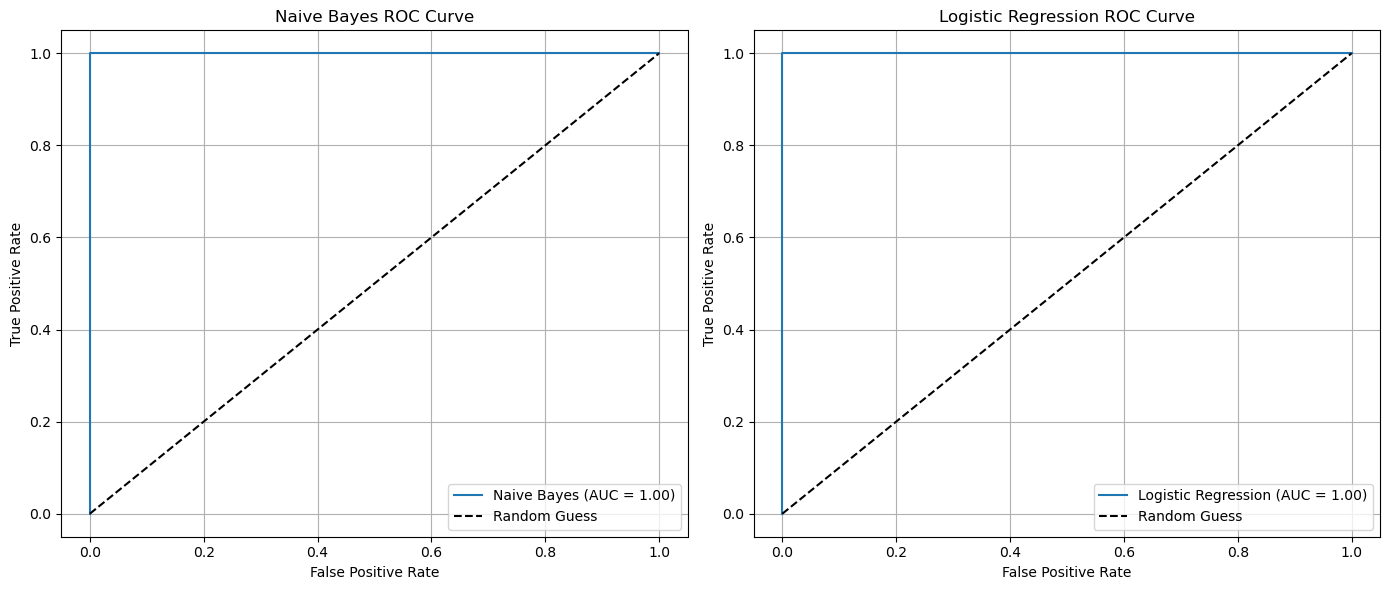

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define a function to plot ROC curve for both models
def plot_roc_curve(fpr, tpr, auc_score, ax, model_name):
    ax.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
    ax.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    ax.set_title(f"{model_name} ROC Curve")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()
    ax.grid()

# Plot Naive Bayes ROC curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb_test)
plot_roc_curve(fpr_nb, tpr_nb, auc_nb_test, axes[0], "Naive Bayes")

# Plot Logistic Regression ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_test)
plot_roc_curve(fpr_lr, tpr_lr, auc_lr_test, axes[1], "Logistic Regression")

plt.tight_layout()
plt.show()

In [145]:
# Lift and Gain function
def lift_gain(y_true, y_prob, num_deciles=10):
    # Convert to DataFrame and sort by probabilities
    df = pd.DataFrame({'Actual': y_true, 'Probability': y_prob}).sort_values('Probability', ascending=False)
    df['Decile'] = pd.qcut(df['Probability'], q=num_deciles, labels=False, duplicates='drop')
    df['Decile'] = num_deciles - df['Decile']
    total_positives = df['Actual'].sum()
    decile, positives, count, cumulative_positives, cumulative_percentage, lift, gain = [], [], [], [], [], [], []
    
    # Group by deciles and calculate values
    grouped = df.groupby('Decile')
    cum_positives = 0
    
    for i, group in grouped:
        decile.append(i)
        pos_in_decile = group['Actual'].sum()
        count.append(len(group))
        
        cum_positives += pos_in_decile
        cumulative_positives.append(cum_positives)
        cumulative_percentage.append(cum_positives / total_positives if total_positives != 0 else 0)
        gain.append(cum_positives / total_positives if total_positives != 0 else 0)
        lift.append((cum_positives / total_positives) / (i / num_deciles) if total_positives != 0 else 0)
        positives.append(pos_in_decile)
    return pd.DataFrame({
        'Decile': decile,
        'Positives': positives, 
        'Count': count,
        'Cumulative Positives': cumulative_positives, 
        'Cumulative Percentage': cumulative_percentage, 
        'Lift': lift, 
        'Gain': gain
    })

In [146]:
# Calculate Lift and Gain for Naive Bayes and Logistic Regression
lift_gain_nb = lift_gain(y_test, y_prob_nb_test)
lift_gain_lr = lift_gain(y_test, y_prob_lr_test)

print("Logistic Regression Lift and Gain:")
print(lift_gain_lr)
print("Naive Bayes Lift and Gain:")
print(lift_gain_nb)


Logistic Regression Lift and Gain:
   Decile  Positives  Count  Cumulative Positives  Cumulative Percentage  \
0       1          7      7                     7               0.250000   
1       2          7      7                    14               0.500000   
2       3          6      6                    20               0.714286   
3       4          7      7                    27               0.964286   
4       5          1      6                    28               1.000000   
5       6          0      7                    28               1.000000   
6       7          0      7                    28               1.000000   
7       8          0      6                    28               1.000000   
8       9          0      7                    28               1.000000   
9      10          0      7                    28               1.000000   

       Lift      Gain  
0  2.500000  0.250000  
1  2.500000  0.500000  
2  2.380952  0.714286  
3  2.410714  0.964286  
4  2.000

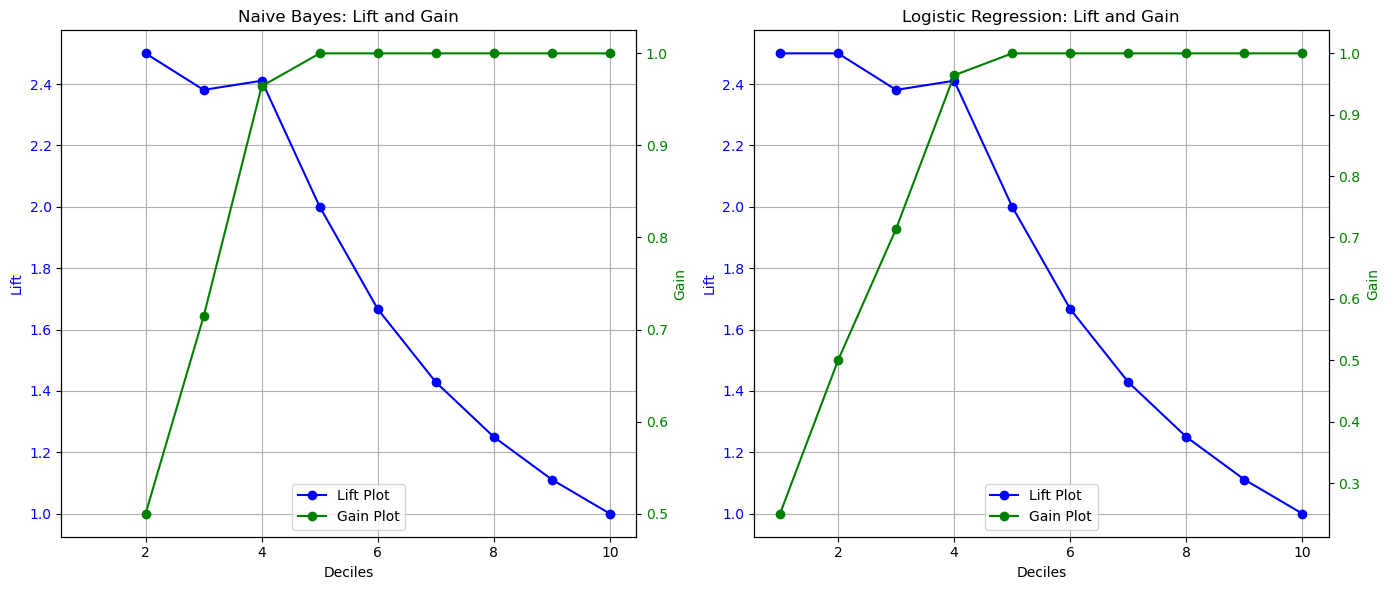

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Define a function to plot Lift and Gain for both models
def plot_lift_gain(lift_gain_data, ax, title):
    # Plot Lift on primary y-axis
    ax.plot(lift_gain_data['Decile'], lift_gain_data['Lift'], label="Lift Plot", marker='o', color='blue')
    ax.set_title(title)
    ax.set_xlabel("Deciles")
    ax.set_ylabel("Lift", color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    ax2 = ax.twinx()
    ax2.plot(lift_gain_data['Decile'], lift_gain_data['Gain'], label="Gain Plot", marker='o', color='green')
    ax2.set_ylabel("Gain", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower center')
    ax.grid()

# Plot Lift and Gain for Naive Bayes
plot_lift_gain(lift_gain_nb, axes[0], "Naive Bayes: Lift and Gain")

# Plot Lift and Gain for Logistic Regression
plot_lift_gain(lift_gain_lr, axes[1], "Logistic Regression: Lift and Gain")

plt.tight_layout()
plt.show()
